<a href="https://colab.research.google.com/github/CVH4OYC/ML_lab/blob/main/_%D0%A4%D0%9C%D0%98_Disbalanced_dataset_Part_1_ipynb__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> Credit card Fraud Detector </h1>


<h2> Введение </h2>

На данной практие (и еще на парочке занятий потом) мы будем реализовывать различные прогностические модели, чтобы проверить, насколько точно они определяют, является ли транзакция обычным платежом (non Fraud) или мошенничеством (Fraud).

<h4> По мотивам кейса, рассмотренного в Зимней школе СберУнивера </h4>

<h2> Наши цели: </h2>
<ul>
<li> Проанализировать полученные данные. </li>
<li> Рассмотреть проблему сильного дисбаланса классов. </li>
<li> Использовать алгоритмы кластеризации </li>
<li> Использовать алгоритмы понижения размерности </li>


## Описание данных и постановка задачи:
**Задача:** Банкам, выпускающим кредитные карты, очень важно распознавать мошеннические операции с кредитными картами, чтобы с клиентов не взималась плата за товары, которые они не покупали.

**Данные**: Набор данных содержит транзакции, совершенные по кредитным картам в сентябре 2013 года европейскими держателями карт.
В этом наборе данных представлены транзакции, проведенные за два дня, где мы имеем 492 случаев мошенничества из 284 807 транзакций. Набор данных сильно несбалансирован, положительный класс (мошенники) составляет всего 0,172% от всех транзакций.

Датасет содержит только числовые входные переменные, которые являются результатом преобразования PCA (метод главных компонент).

Из-за вопросов конфиденциальности невозможно использовать исходные признаки и более подробную информацию о них. Характеристики V1, V2, ... V28 - это главные компоненты, полученные с помощью PCA, единственные характеристики, которые не были преобразованы с помощью PCA - это "Time" и "Amount". Столбец "Time" содержит секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных. Столбец "Amount" - это сумма транзакции. Столбец "Class" является переменной отклика и принимает значение 1 в случае мошенничества и 0 в противном случае.





In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

Подключимся к диску для загрузки данных.

Загружаем данные:
'creditcard.csv'

In [36]:
#from google.colab import drive
#drive.mount('/content/drive')

In [37]:
# загрузка данных и структура данных
df=pd.read_csv('/content/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Небольшой описательный анализ.

In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [39]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Проверим на наличие пропусков в данных.

In [40]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0



Пропусков нет?

Выведем названия столбцов.

In [41]:
print("Названия столбцов:\n")
for column_name in df.columns:
    print(column_name)

Названия столбцов:

Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount
Class


Еще раз оценим отношение классов целевой переменной.

In [42]:
# вывод на печать 'Обычные транзакции составляют' и 'Мошеннические транзакции составляют' в процентном соотношении

In [43]:
# df['Class'].value_counts()  - возвращает словарик,
# где ключ - уникальные значения в столбце Class кол-во значений
# value - сколько всего записей имело эти значения


# так как это словарь, то чтобы получить значения, обращаемся по ключу:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [44]:
#  вывод отношения классов целевой переменной, но записанный через f строку

n_trans = (df['Class'].value_counts()[0] / len(df)) * 100
f_trans = (df['Class'].value_counts()[1] /  len(df)) * 100

print(f'Обычные транзакции составляют {n_trans}% данных')
print(f'Мошеннические транзакции составляют {f_trans}% данных')

Обычные транзакции составляют 99.82725143693798% данных
Мошеннические транзакции составляют 0.1727485630620034% данных


**Важно!**

Обратите внимание, насколько несбалансированным является наш исходный набор данных! Большинство транзакций не являются мошенническими. Если мы используем этот массив данных в качестве основы для наших моделей прогнозирования и анализа, мы можем получить много ошибок, поскольку наши алгоритмы будут предполагать, что все транзакции не являются мошенничеством. Нам же критически важно сконцентрироваться именно на мошенниках.

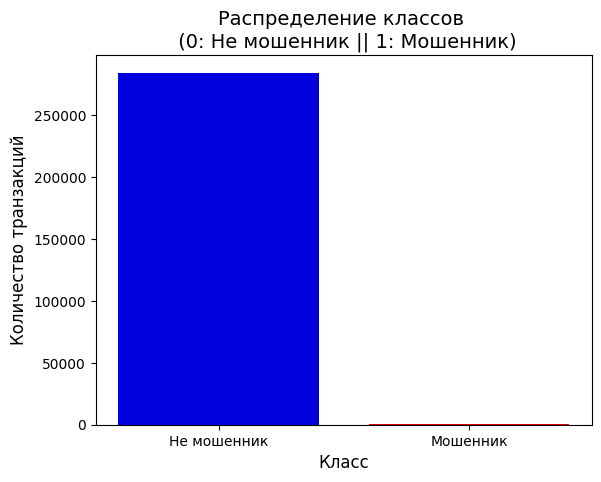

In [45]:
colors = ["#0101DF", "#DF0101"]


plt.title('Распределение классов \n (0: Не мошенник || 1: Мошенник)', fontsize=14)

class_counts = df['Class'].value_counts()
plt.bar(class_counts.index, class_counts.values, color=colors)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Количество транзакций', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Не мошенник', 'Мошенник'])


plt.show()

Построим распределения по суммам и времени транзакций.

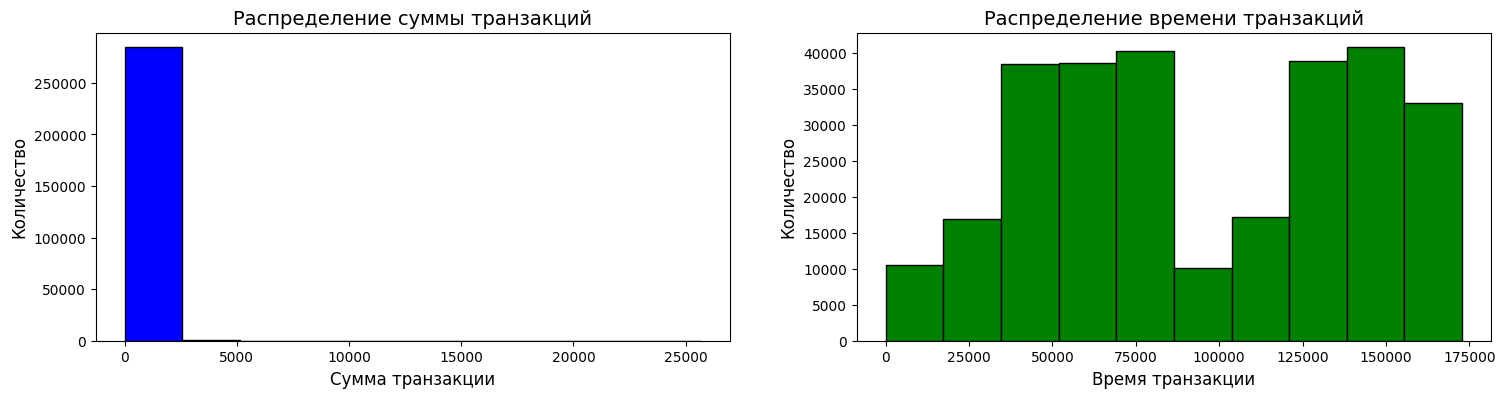

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
# Получаем данные для сумм и времени транзакций
amount_val = df['Amount'].values
time_val = df['Time'].values

# ВАШ КОД ЗДЕСЬ # строим график распределения суммы транзакций
ax[0].hist(amount_val, color='blue', edgecolor='black')
ax[0].set_title('Распределение суммы транзакций', fontsize=14)
ax[0].set_xlabel('Сумма транзакции', fontsize=12)
ax[0].set_ylabel('Количество', fontsize=12)

# ВАШ КОД ЗДЕСЬ # строим график распределения времени транзакций
ax[1].hist(time_val, color='green', edgecolor='black')
ax[1].set_title('Распределение времени транзакций', fontsize=14)
ax[1].set_xlabel('Время транзакции', fontsize=12)
ax[1].set_ylabel('Количество', fontsize=12)


plt.show()


### Масштабирование
Первым делом нам необходимо отмасштабировать столбцы **Time** и **Amount**. Поскольку все остальные признаки уже отмасштабированы. Однако делать это нужно только строго **после** разбиения на обучающую выборку и тестовую.

Затем необходимо создать подвыборку из наших данных, чтобы иметь равное количество случаев мошенничества и не мошенничества, что поможет нашим моделям лучше понять закономерности, определяющие, является ли транзакция мошенничеством или нет.

### Зачем создавать подвыборку?
Наши данные имеют сильный дисбаланс. Использование исходного датасета приведет к следующим проблемам:
  - **Переобучение**: Наши модели классификации будут предполагать, что в большинстве случаев мошенничества не существует! Мы хотим, чтобы наша модель точно определяла, когда происходит мошенничество.
  - **Неверные корреляции:** Хотя мы не знаем, что обозначают признаки "V", будет полезно понять, как каждый из этих признаков влияет на результат (мошенничество или отсутствие мошенничества), поскольку, имея несбалансированный набор данных, мы не можем увидеть истинные корреляции между целевой переменной и признаками.

### Разделение данных
**Важно!**

Прежде, чем приступить к балансировке наших данных, мы должны разделить исходный набор данных. Зачем?

Для определения качества работы наших моделей их необходимо тестировать на **исходном** тестовом наборе, а не на тестовом наборе, созданном после балансировки. Цель балансировки заключается в том, чтобы модель смогла найти закономерности для принятия решения по типу транзакции, поэтому мы выравниваем соотношение между мошенническими транзакциями и обычными. Однако проверять качество мы будем именно в "боевых" условиях с учетом реального распределения данных.




In [47]:
from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler() # Менее чувствителен к выбросам, чем просто стандартизация

X = df.drop('Class', axis=1)
y = df['Class']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2,
                                                                                    random_state = 42)


# Посмотрим, какие типы данных возвращаются после разделения:
rt_tmp = original_Xtrain['Amount']
print (f'Тип данных original_Xtrain["Amount"] {type(rt_tmp)}')
print (f'Тип данных original_Xtrain["Amount"].values {type(rt_tmp.values)}')
print (f'Данные original_Xtrain["Amount"].values {rt_tmp.values}')
print (f'Тип данных original_Xtrain["Amount"].values.reshape(-1,1) {type(rt_tmp.values.reshape(-1,1))}')
print (f'Данные original_Xtrain["Amount"].values.reshape(-1,1) \n{rt_tmp.values.reshape(-1,1)} \n')

# вот последнее представление - как раз то, что нужно для RobustScaler . Преобразовываем так все нужные столбцы.

original_Xtrain['scaled_amount'] = rob_scaler.fit_transform(original_Xtrain['Amount'].values.reshape(-1,1))
original_Xtest['scaled_amount'] = rob_scaler.transform(original_Xtest['Amount'].values.reshape(-1,1))

original_Xtrain['scaled_time'] = rob_scaler.fit_transform(original_Xtrain['Time'].values.reshape(-1,1))
original_Xtest['scaled_time'] = rob_scaler.transform(original_Xtest['Time'].values.reshape(-1,1))

original_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
original_Xtest.drop(['Time','Amount'], axis=1, inplace=True)

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label/ len(original_ytrain))
print("Тестовый набор:", test_counts_label/ len(original_ytest))

Тип данных original_Xtrain["Amount"] <class 'pandas.core.series.Series'>
Тип данных original_Xtrain["Amount"].values <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values [  9.99  45.9   11.99 ...   3.94   1.   113.  ]
Тип данных original_Xtrain["Amount"].values.reshape(-1,1) <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values.reshape(-1,1) 
[[  9.99]
 [ 45.9 ]
 [ 11.99]
 ...
 [  3.94]
 [  1.  ]
 [113.  ]] 

Распределение классов: 

Обучающий набор: [0.99827075 0.00172925]
Тестовый набор: [0.99827955 0.00172045]


## Метод Random Under-Sampling

Применим метод *Random Under-Sampling*, который случайным образом удаляет объекты доминирующего класса и выравнивает соотношение классов.

#### Алгоритм:
<ul>
<li>Определяем степень несбалансированности (посчитали количество меток одного и другого класса выше)  </li>
<li>Как только мы определим, сколько случаев считаются мошенническими операциями (Fraud = "1"), мы должны довести количество немошеннических операций до того же количества, что и мошеннических (мы хотим получить соотношение 50/50 между классами), то есть это в подвыборке будет 492 случая мошенничества и 492 случая немошеннических операций.  </li>
<li> После применения этого метода мы получим подвыборку нашего набора данных с соотношением 50/50 в отношении наших классов. Наконец, не забудем <b>перемешать</b> наши данные для того, чтобы модели не зависили от порядка входных данных.</li>
</ul>

**Важно!**

Основная проблема данного метода заключается в том, что мы рискуем тем, что наши модели классификации не будут работать так точно, как нам хотелось бы, поскольку происходит большая потеря информации (выделение всего 492 немошеннических транзакций из 284 315 немошеннических транзакций).

In [48]:
# Поскольку наши классы сильно не сбалансированы, мы должны сделать их эквивалентными,
# чтобы получить нормальное распределение классов.

# Перемешаем данные перед созданием подвыборок

df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492] # берем последние 492 транзакции

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Перемешивание строк датасета
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
104176,68945.0,1.067514,-0.194952,1.114847,1.524106,-0.471085,1.115459,-0.638123,0.444894,0.990858,...,-0.385958,-0.652606,0.033048,-0.296623,0.446290,-0.506929,0.088811,0.014919,6.80,0
144108,85867.0,-3.586964,2.609127,-5.568577,3.631947,-4.543590,-0.157899,-4.089128,2.417305,-3.239901,...,1.024423,0.428756,0.182032,-0.534598,0.168933,-0.149844,0.685517,-0.299728,310.42,1
246630,153251.0,-1.655887,0.245394,2.133503,-0.989326,-1.563971,0.169681,-0.759279,0.491190,-0.313651,...,-0.106654,0.284365,-0.432906,-0.020189,0.177774,-0.152396,-0.775328,-0.536192,55.13,0
191359,129222.0,1.177824,2.487103,-5.330608,5.324547,1.150243,-1.281843,-1.171994,0.413778,-2.659840,...,0.262325,-0.431790,-0.092088,0.145216,0.457788,0.167739,0.451243,0.268421,4.87,1
154694,102622.0,-2.877176,4.569649,-9.553069,4.441079,-3.653961,-1.877981,-3.514353,1.547608,-2.503304,...,1.272896,1.300268,-0.003950,-0.360848,-0.597526,-0.390901,0.592197,-0.241010,346.94,1


In [49]:
df.to_csv("/content/creditcard_full.csv")

In [50]:
new_df.shape

(984, 31)

Распределение классов в подвыборке


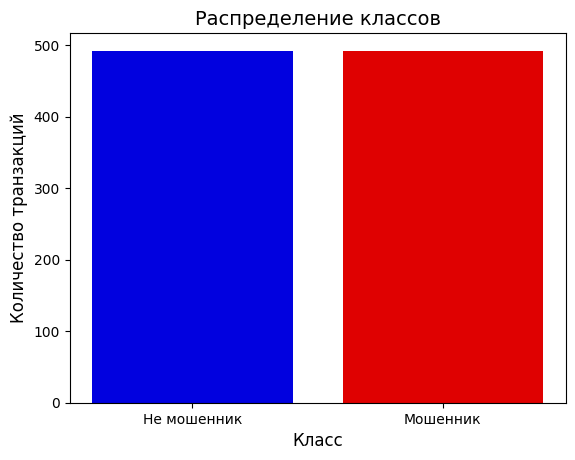

In [51]:
print('Распределение классов в подвыборке')


# проверяем снова распределение целевой переменной

plt.title('Распределение классов', fontsize=14)
colors = ["#0101DF", "#DF0101"]

class_counts = new_df['Class'].value_counts()
plt.bar(class_counts.index, class_counts.values, color=colors)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Количество транзакций', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Не мошенник', 'Мошенник'])


plt.show()


### Матрица корреляций

Корреляционные матрицы очень важны для понимания данных. Мы хотим узнать, есть ли признаки, которые оказывают сильное влияние на то, является ли конкретная транзакция мошенничеством. Однако важно, чтобы мы использовали сбалансированную подвыборку, чтобы увидеть, какие признаки имеют высокую положительную или отрицательную корреляцию в отношении мошеннических операций.


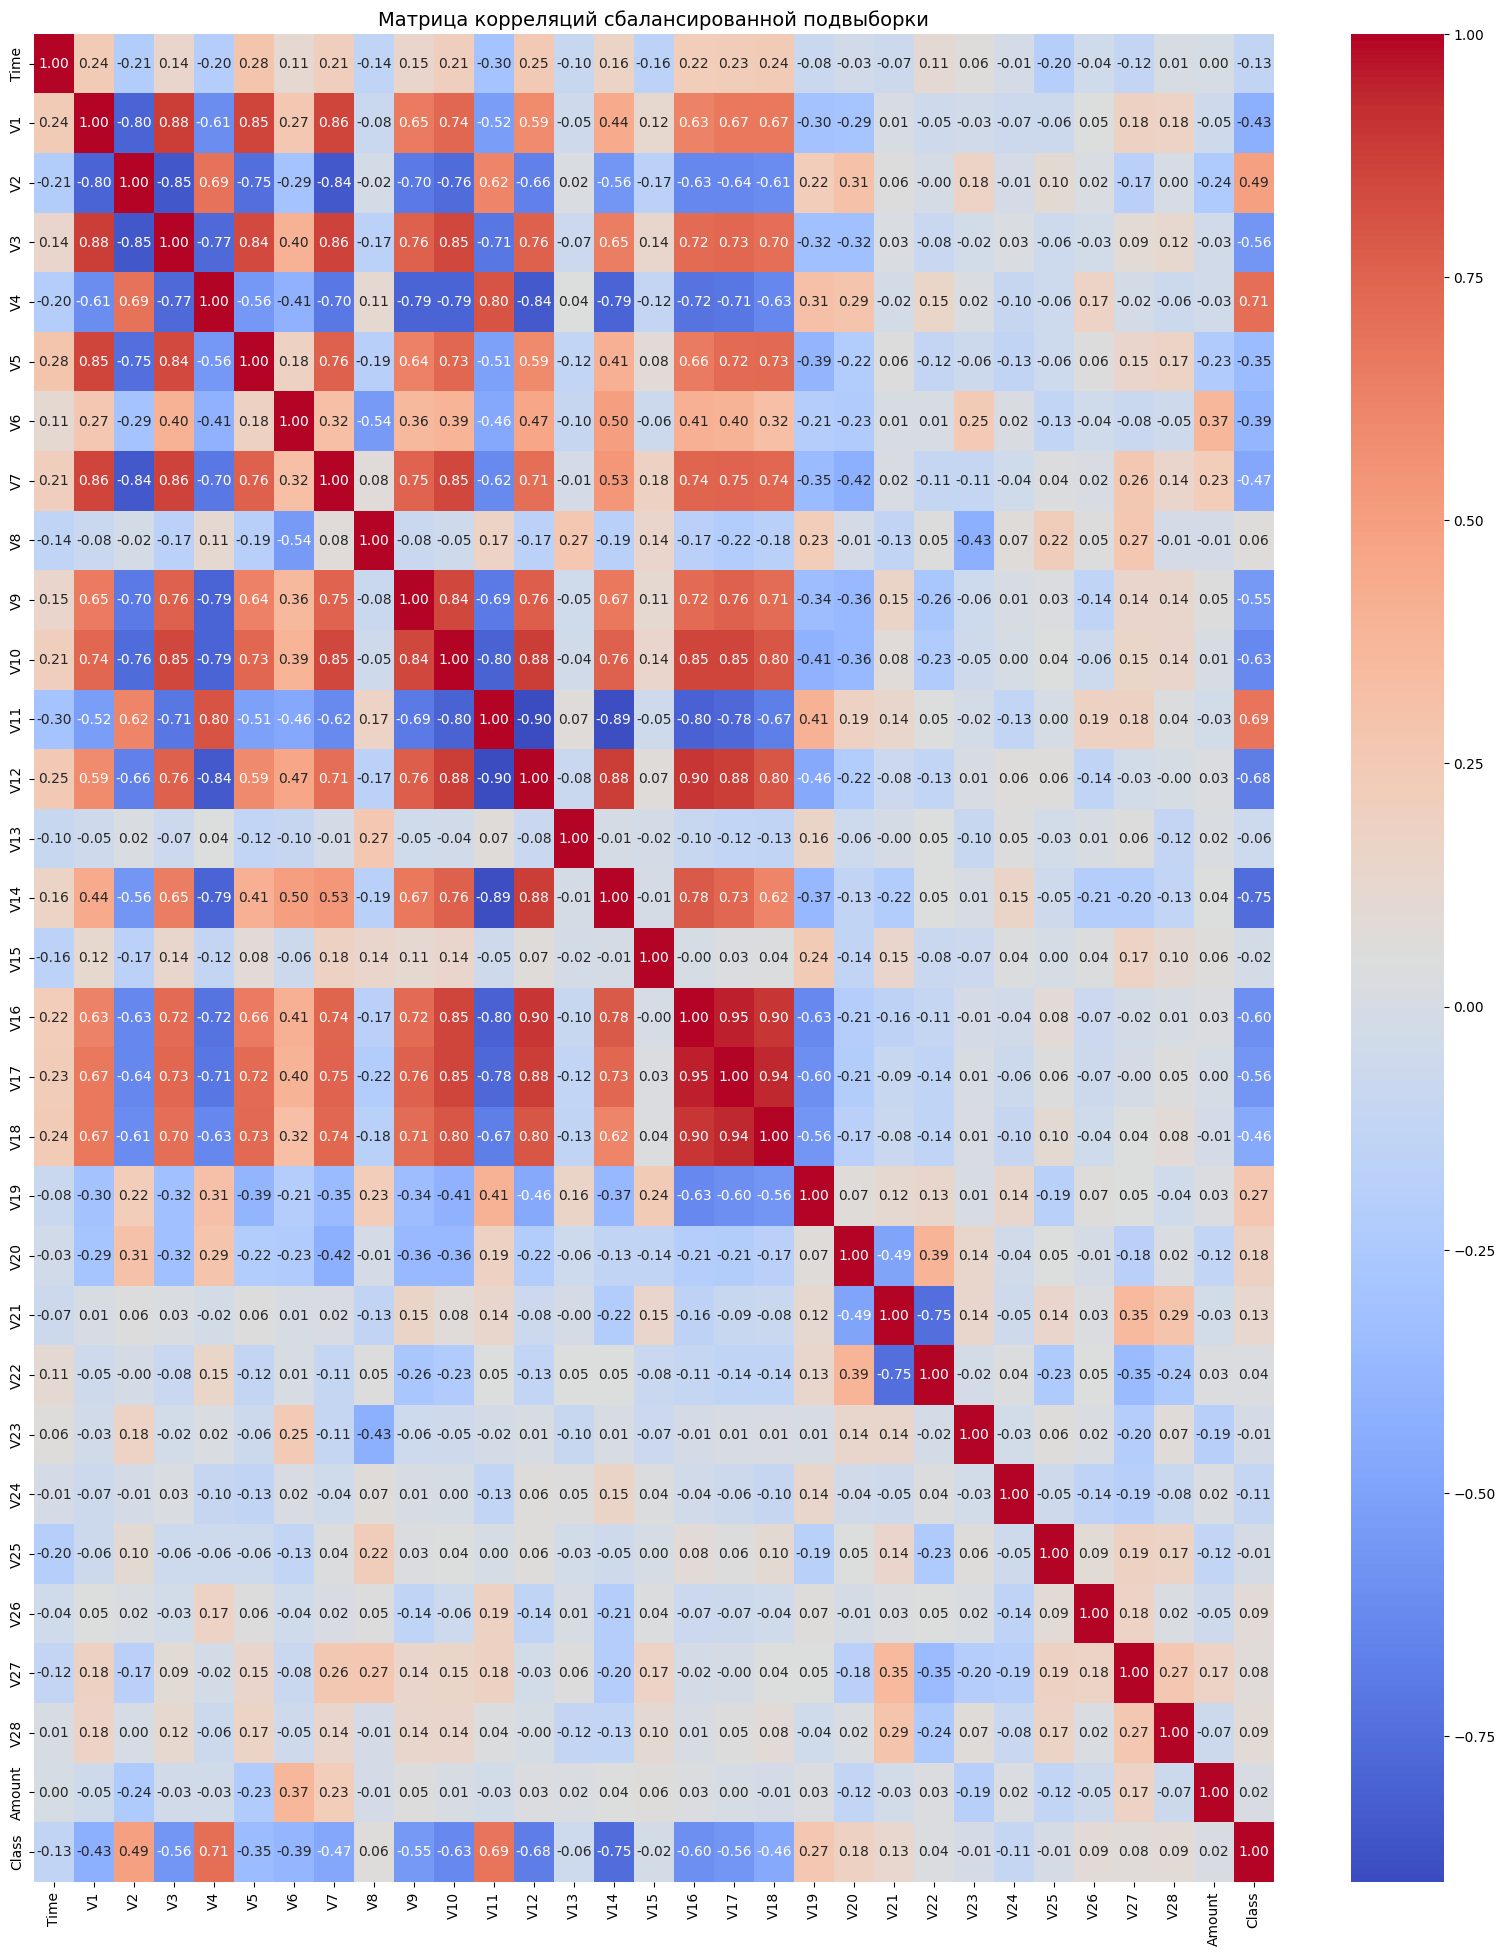

In [52]:
f, ax = plt.subplots(1, 1, figsize=(20, 24))

correlation_matrix = new_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

ax.set_title('Матрица корреляций сбалансированной подвыборки', fontsize=14)
plt.show()


### Выводы:
<ul>
<li><b>Отрицательные корреляции: </b> Какие признаки  имеют отрицательную корреляцию? Другими словами, чем ниже эти значения, тем больше вероятность того, что конечным результатом будет мошенническая операция.  </li>
<li> <b> Положительные корреляции: </b> Какие признаки  положительно коррелируют? То есть, чем выше эти значения, тем больше вероятность того, что конечным результатом будет мошенническая операция. </li>
</ul>


**Важно!**

Всегда проверяйте, используете ли вы сбалансированную подвыборку в корреляционной матрице, иначе на корреляционную матрицу повлияет сильный дисбаланс между классами.

Построим теперь Boxplot.

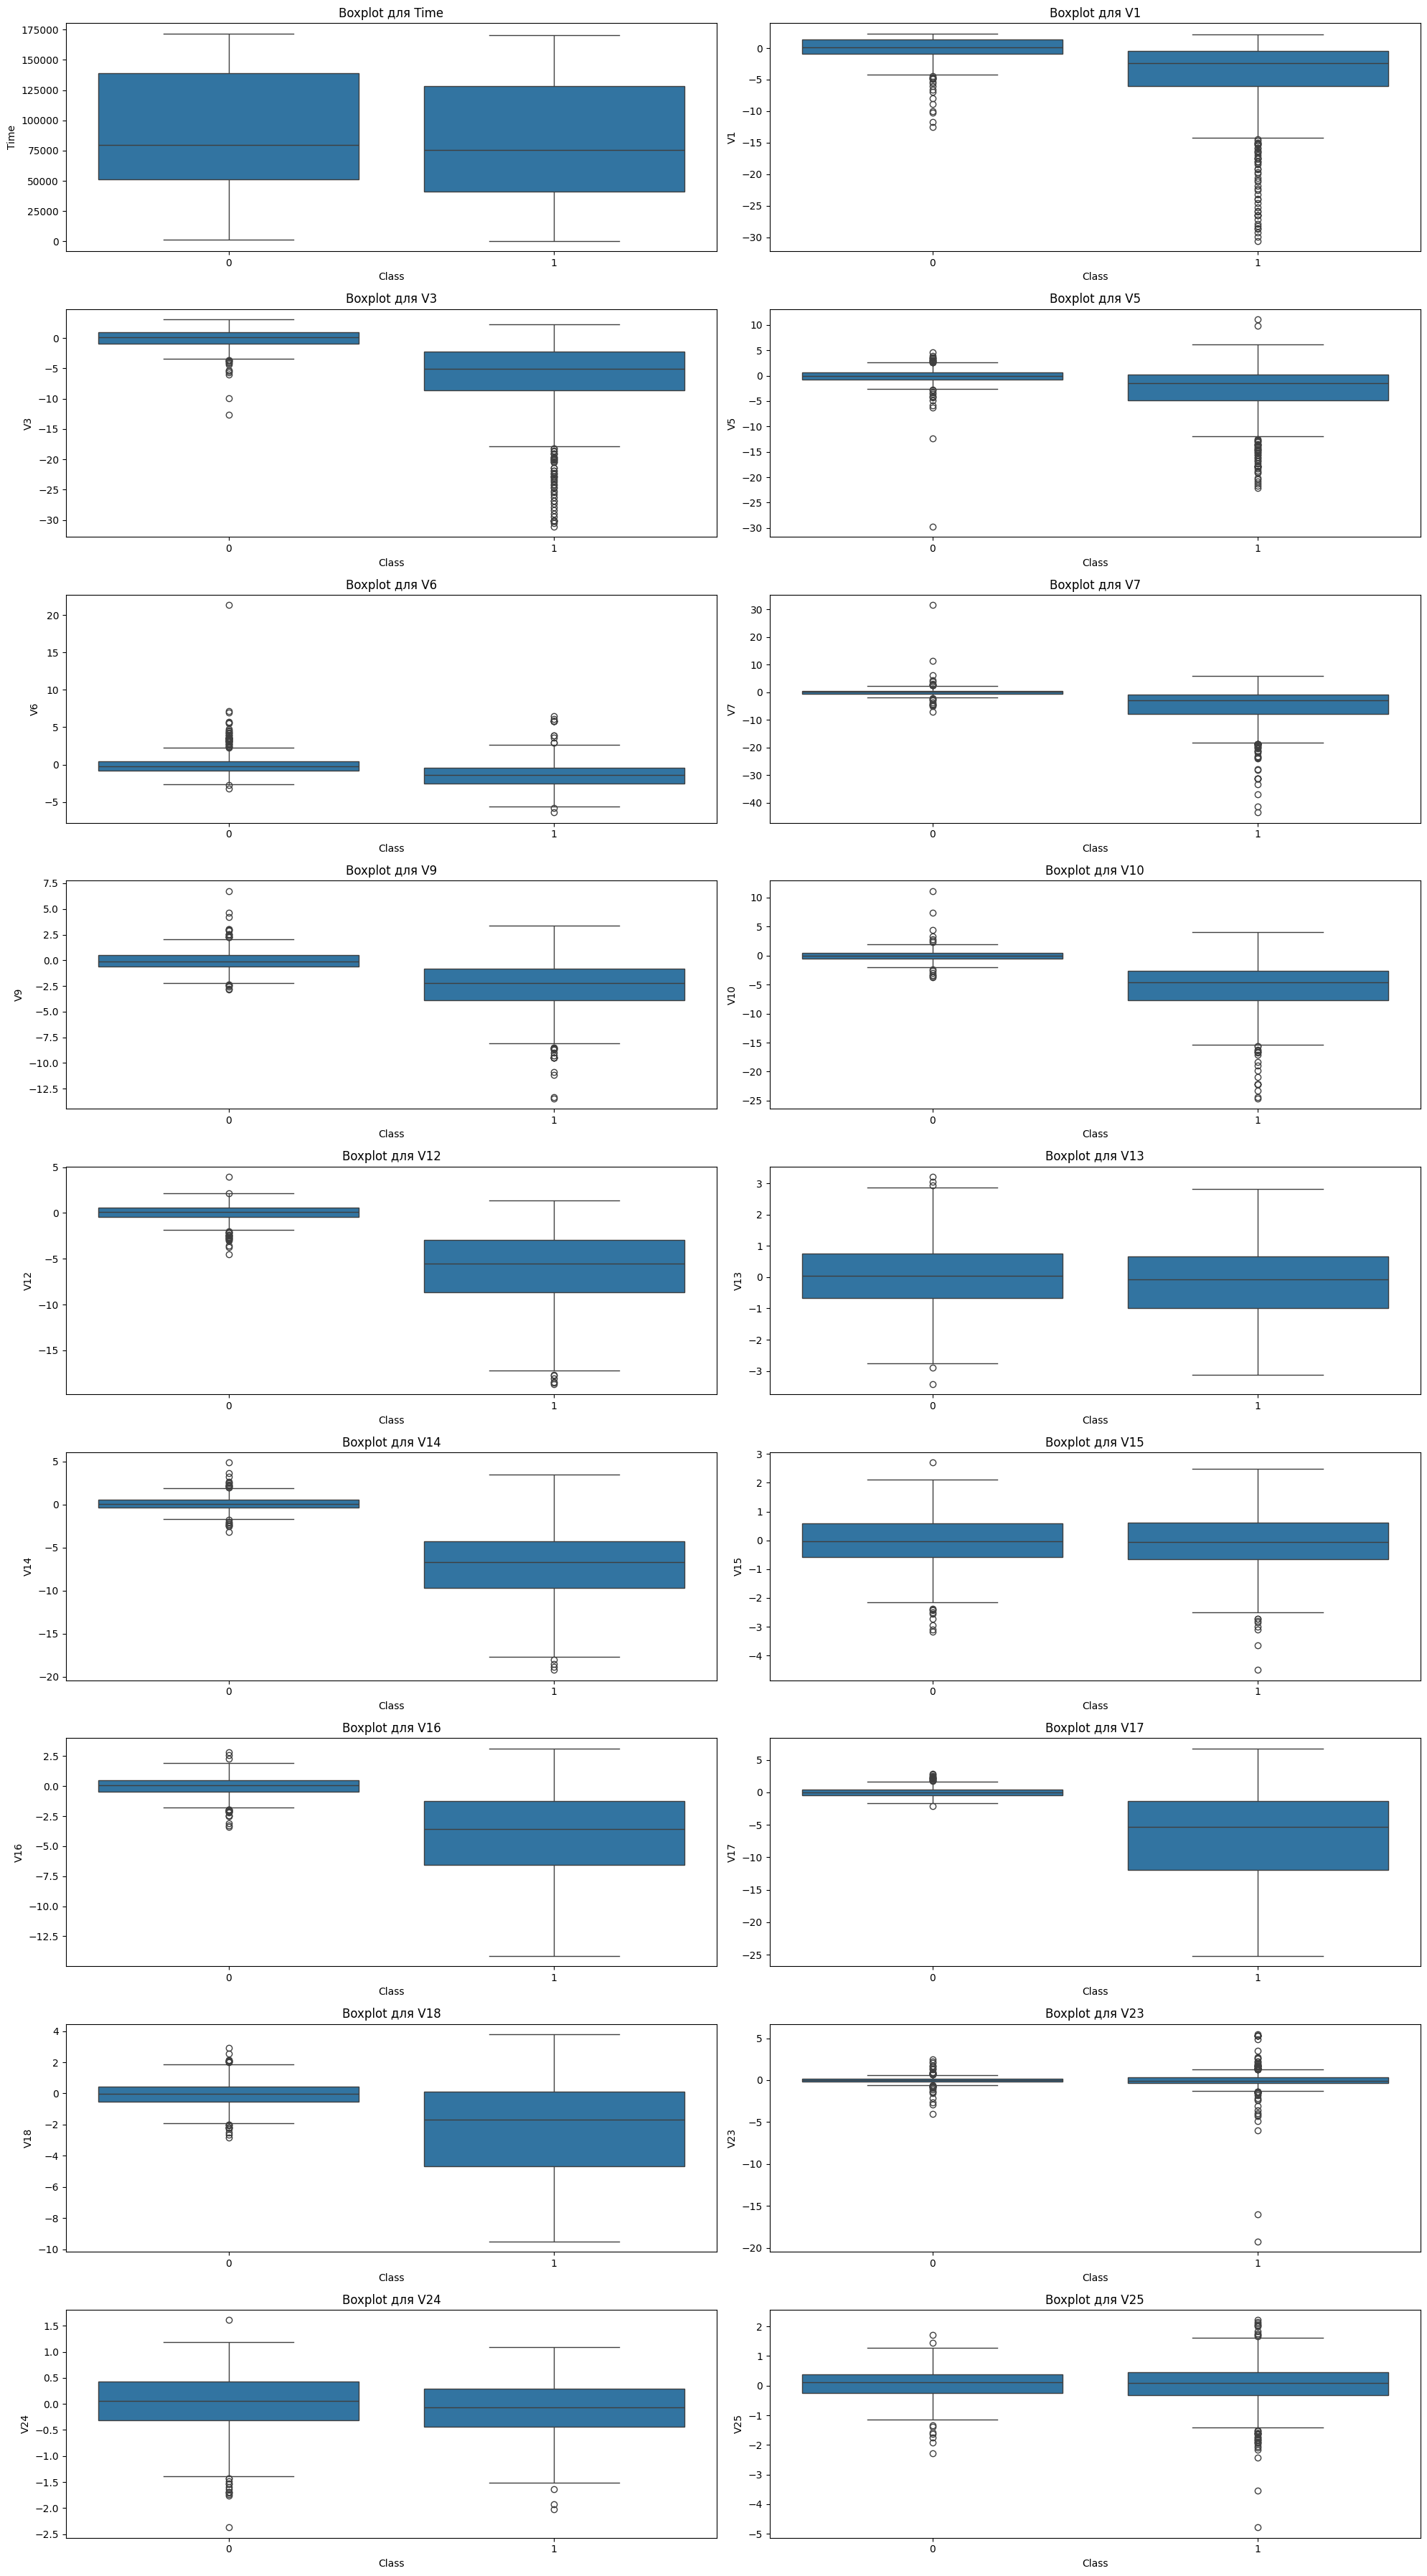

In [53]:
# Отрицательные корреляции

negative_corr_features = correlation_matrix[correlation_matrix['Class'] < 0]['Class'].index.tolist()

# Указываем количество столбцов
ncols = 2
nrows = int(np.ceil(len(negative_corr_features) / ncols))  # Количество строк

# Создаем подграфики для boxplot
f, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 4))
axes = axes.flatten()  # Упрощаем индексацию

# Строим boxplot для каждого признака с отрицательной корреляцией
for i, feature in enumerate(negative_corr_features):
    sns.boxplot(x='Class', y=feature, data=new_df, ax=axes[i])
    axes[i].set_title(f'Boxplot для {feature}', fontsize=12)

# Убираем лишние подграфики, если они есть
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Скрыть лишние подграфики

plt.tight_layout()
plt.show()


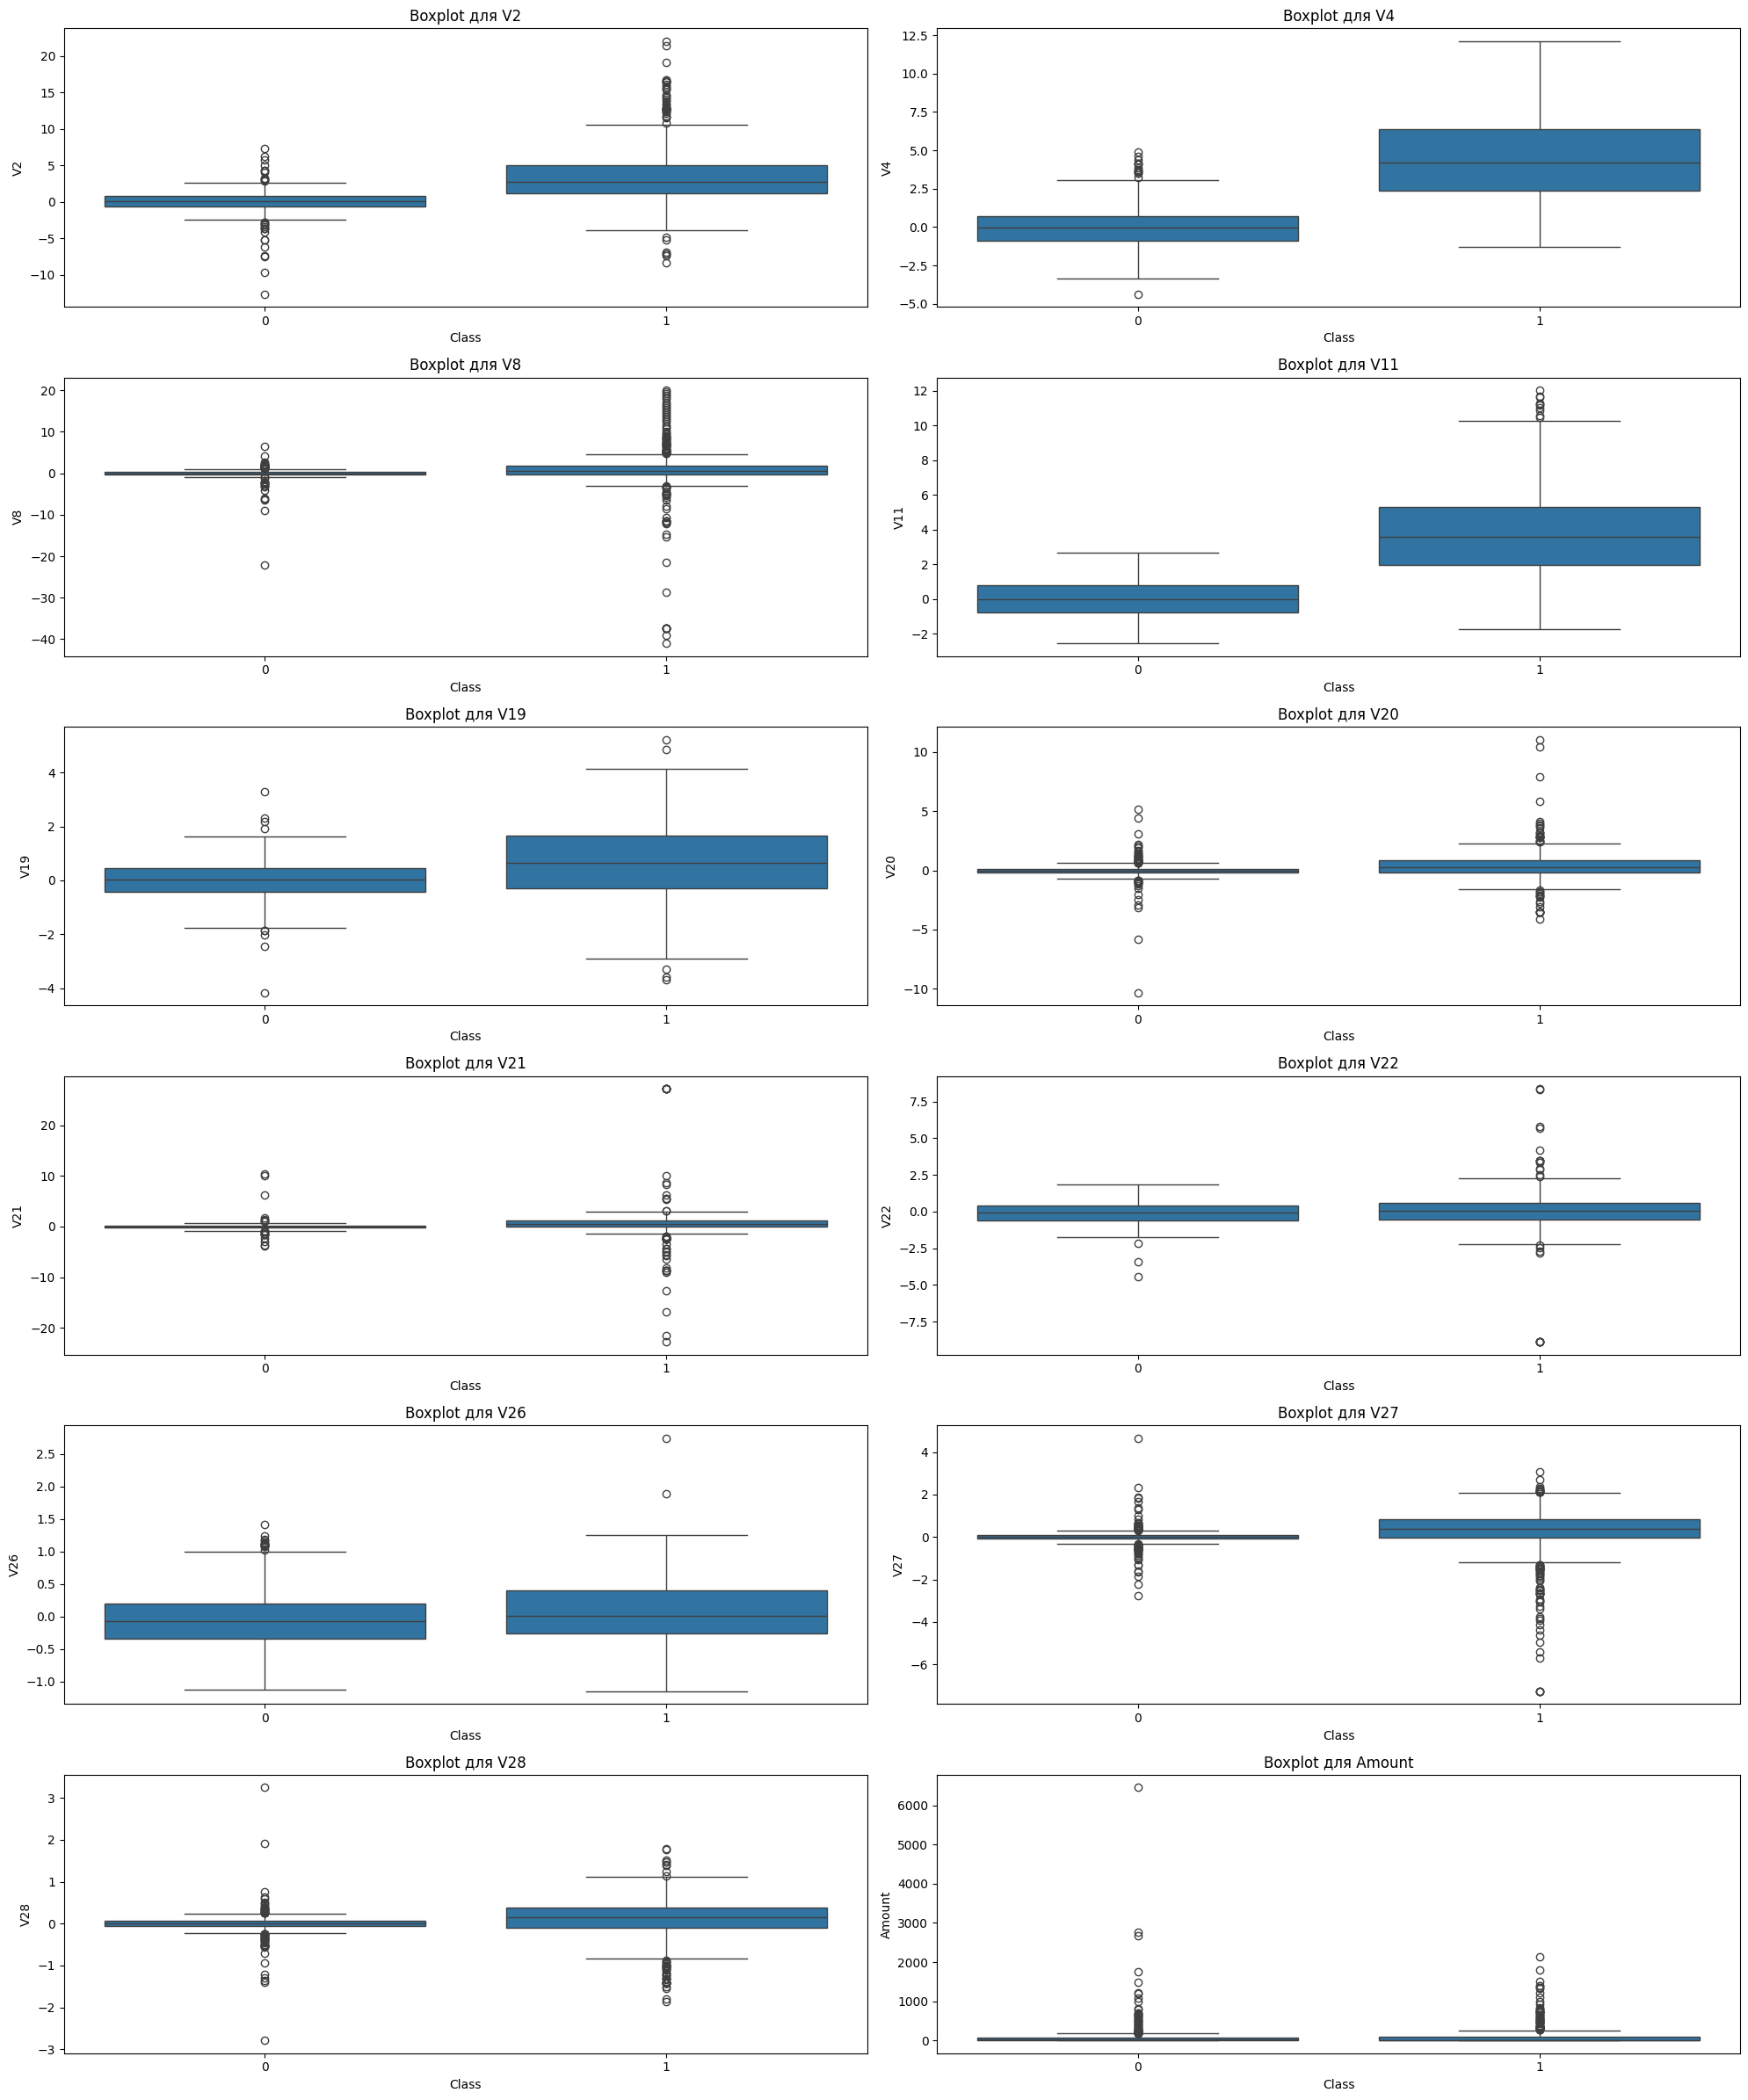

In [54]:

# Положительные корреляции
positive_corr_features = correlation_matrix[correlation_matrix['Class'] > 0]['Class'].index.tolist()
positive_corr_features.remove('Class')  # Удаляем сам класс из списка

ncols = 2
nrows = int(np.ceil(len(positive_corr_features) / ncols))


f, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 4))
axes = axes.flatten()


for i, feature in enumerate(positive_corr_features):
    sns.boxplot(x='Class', y=feature, data=new_df, ax=axes[i])
    axes[i].set_title(f'Boxplot для {feature}', fontsize=12)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



# Какие выводы можно сделать по построенным Boxplot?

Напоминаю.

0 - это не мошеннические транзакции

1 - мошеннические транзакции

Вывод: на большинстве графиков можно увидеть, что мошеннические транзакции отличаются от немошеннических. Также на большинстве графиков присутствуют выбросы.

## Обработка выбросов

Наша основная цель в этом разделе - удалить выбросы из признаков, которые имеют высокую корреляцию с целевой переменной. Это положительно скажется на точности наших моделей.


### Метод межквартильного размаха:
<ul>
<li> <b>Interquartile Range (IQR): </b> Рассчитываем разницу между 75-м процентилем и 25-м процентилем. Наша цель - создать порог за пределами 75-го и 25-го процентилей, чтобы в случае, если какой-то экземпляр выборки преодолеет этот порог, он был удален.  </li>
<li> <b>Построить Boxplots: </b> С помощью boxplot легко увидеть 25-й и 75-й процентили и выбросы. </li>
</ul>

Надо быть внимательным к тому, как далеко мы хотим установить порог для удаления выбросов. Мы определяем порог путем умножения числа (например, 1.5) на интерквартильный размах. Чем выше этот порог, тем меньше выбросов будет обнаружено, а чем ниже этот порог, тем больше выбросов будет обнаружено.  <br><br>

Мы хотим больше сосредоточиться именно на сильных выбросах, а не просто на выбросах. Почему? Потому что удалив все выбросы, мы можем столкнуться с риском потери информации, что приведет к снижению точности наших моделей.


### Итого:
<ul>
<li> <b> Строим распределения </b>  </li>
<li><b>Определяем порог </b> </li>
<li> <b>Удаляем выбросы </b> </li>
<li> <b> Строим Boxplot </b> </li>
</ul>

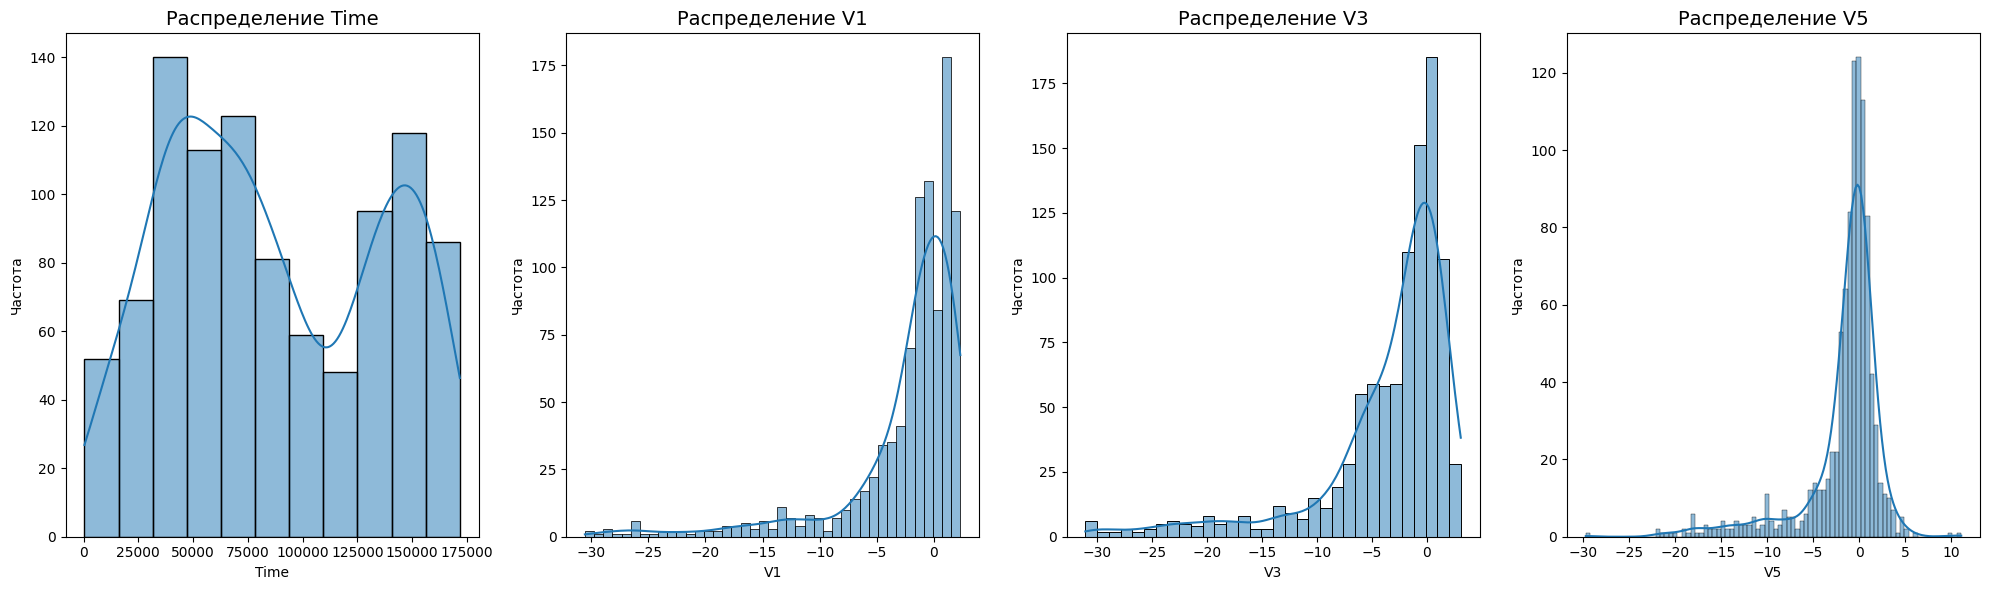

In [55]:
# Строим распределения для признаков с отрицательной корреляцией
from scipy.stats import norm



f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))

for i, feature in enumerate(negative_corr_features[:4]):
    sns.histplot(new_df[feature], ax=eval(f'ax{i+1}'), kde=True)
    ax = eval(f'ax{i+1}')
    ax.set_title(f'Распределение {feature}', fontsize=14)
    ax.set_xlabel(feature)
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()


In [56]:
# Удаление выбросов из признака V17
v17_fraud = new_df['V17'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v17_fraud, 25), np.percentile(v17_fraud, 75)
print('Квартиль 25: {} | Квартиль 75: {}'.format(q25, q75))
v17_iqr = q75 - q25
print('iqr: {}'.format(v17_iqr))

v17_cut_off = v17_iqr * 1.5
v17_lower, v17_upper = q25 - v17_cut_off, q75 + v17_cut_off
print('Порог: {}'.format(v17_cut_off))
print('V17 нижняя граница: {}'.format(v17_lower))
print('V17 верхняя граница: {}'.format(v17_upper))

outliers = [x for x in v17_fraud if x < v17_lower or x > v17_upper]
print('Количество выбросов: {}'.format(len(outliers)))

new_df_without_outliers  = new_df.drop(new_df[(new_df['V17'] > v17_upper) | (new_df['V17'] < v17_lower)].index)
print('----' * 44)



#### Для остальных признаков на основе V17 описать функцию, в качастве параметра которой будут вытупать выбросы других признаков
### Написать вызов функции по нужным признакам

Квартиль 25: -11.945057187644576 | Квартиль 75: -1.34193993162032
iqr: 10.603117256024255
Порог: 15.904675884036383
V17 нижняя граница: -27.84973307168096
V17 верхняя граница: 14.562735952416062
Количество выбросов: 0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [58]:
def remove_outliers_iqr(data, feature, target_class=1, multiplier=1.5):

    # Фильтруем данные по целевому классу
    filtered_data = data[data['Class'] == target_class][feature].values

    # Вычисляем квартиль 25 и 75
    q25, q75 = np.percentile(filtered_data, 25), np.percentile(filtered_data, 75)
    print('Квартиль 25: {} | Квартиль 75: {}'.format(q25, q75))
    iqr = q75 - q25
    print('iqr: {}'.format(iqr))

    # Определяем пороги выбросов
    cut_off = iqr * multiplier
    lower_bound = q25 - cut_off
    upper_bound = q75 + cut_off
    print('Порог: {}'.format(cut_off))
    print('нижняя граница: {}'.format(lower_bound))
    print('верхняя граница: {}'.format(upper_bound))

    # Определяем выбросы
    outliers = filtered_data[(filtered_data < lower_bound) | (filtered_data > upper_bound)]
    print('Количество выбросов: {}'.format(len(outliers)))

    # Удаляем выбросы из оригинального DataFrame
    filtered_indices = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)].index
    new_data = data.loc[filtered_indices]
    print('----' * 44)
    return new_data




In [59]:
new_df_without_outliers = remove_outliers_iqr(new_df_without_outliers, 'V1')
new_df_without_outliers= remove_outliers_iqr(new_df_without_outliers, 'V3')
new_df_without_outliers = remove_outliers_iqr(new_df_without_outliers, 'V5')
new_df_without_outliers = remove_outliers_iqr(new_df_without_outliers, 'V7')
new_df_without_outliers = remove_outliers_iqr(new_df_without_outliers, 'V27')
new_df_without_outliers = remove_outliers_iqr(new_df_without_outliers, 'V28')

Квартиль 25: -6.03606299434868 | Квартиль 75: -0.419200076257679
iqr: 5.616862918091001
Порог: 8.4252943771365
нижняя граница: -14.461357371485182
верхняя граница: 8.006094300878821
Количество выбросов: 52
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Квартиль 25: -6.772083411900687 | Квартиль 75: -1.994731213766535
iqr: 4.777352198134152
Порог: 7.166028297201228
нижняя граница: -13.938111709101914
верхняя граница: 5.171297083434693
Количество выбросов: 20
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Квартиль 25: -2.7677800074921226 | Квартиль 75: 0.44651213903395276
iqr: 3.214292146526075
Порог: 4.821438219789113
нижняя граница: -7.589218227281235
верхняя граница: 5.267950358823065
Количество выбросов: 25
---------------------

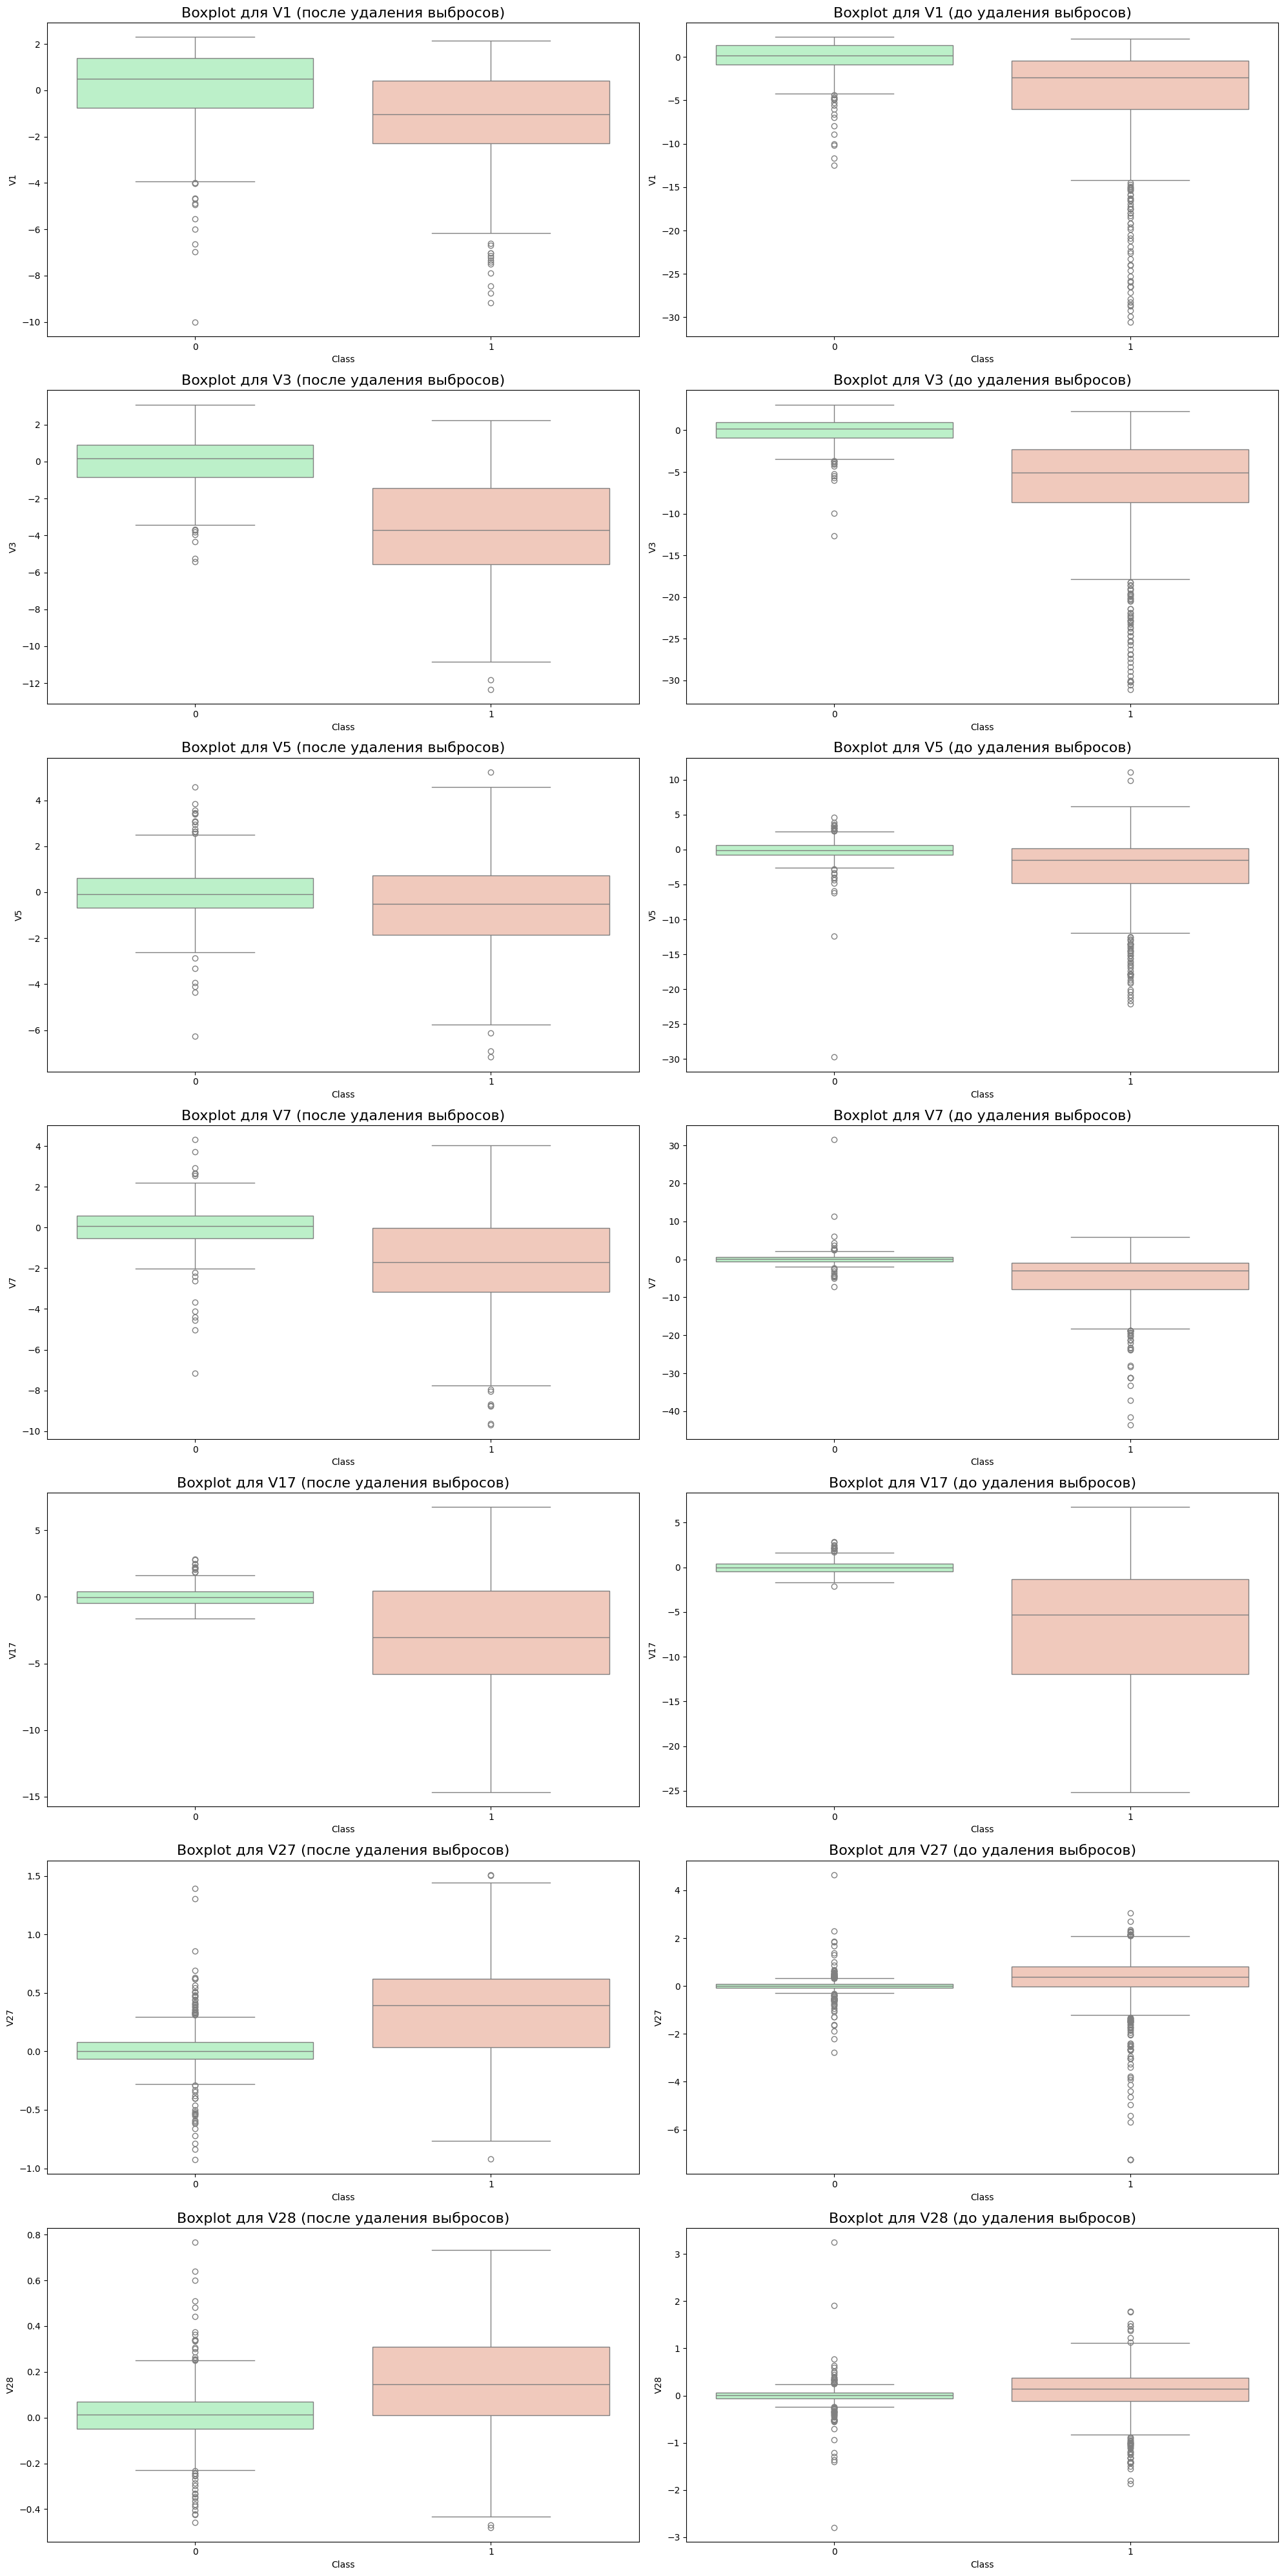

In [61]:
# Выберите признаки для визуализации
features_to_plot = ['V1', 'V3', 'V5', 'V7','V17','V27', 'V28']

# Создаем фигуру для подграфиков
f, ax = plt.subplots(len(features_to_plot), 2, figsize=(20, 40))

# Установим цвета для графиков
colors = ['#B3F9C5', '#f9c5b3']

# Цикл по признакам для построения boxplot до и после удаления выбросов
for i, feature in enumerate(features_to_plot):
    # Boxplot для признака V17 после удаления выбросов
    sns.boxplot(x='Class', y=feature, data=new_df_without_outliers, ax=ax[i, 0], palette=colors)
    ax[i, 0].set_title(f'Boxplot для {feature} (после удаления выбросов)', fontsize=16)

    # Boxplot для признака V17 до удаления выбросов
    sns.boxplot(x='Class', y=feature, data=new_df, ax=ax[i, 1], palette=colors)
    ax[i, 1].set_title(f'Boxplot для {feature} (до удаления выбросов)', fontsize=16)

# Настройка отступов для графиков
plt.tight_layout()
plt.show()

In [62]:
# теперь у нас в датафрейме new_df будут лежать данные без выбросов.

new_df = new_df_without_outliers

### Понижение размерности и кластеризация

Для того, чтобы убедиться, что наши классы являются разделимыми (иначе строить модели нет смысла), выполним кластеризацию с помощью трех различных техник кластеризации.



In [63]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

X = new_df.drop('Class', axis=1)
y = new_df['Class']

X.drop(['Time','Amount'], axis=1, inplace=True) # Tак как Time и Amount не коррелируют почти с таргетом


# T-SNE алгоритм
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)  # Применяем T-SNE
t1 = time.time()
print("T-SNE заняло {:.2} сек".format(t1 - t0))

# PCA алгоритм
t0 = time.time()
# ВАШ КОД ЗДЕСЬ
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X)  # Применяем PCA
t1 = time.time()
print("PCA заняло {:.2} сек".format(t1 - t0))

# TruncatedSVD алгоритм
t0 = time.time()
# ВАШ КОД ЗДЕСЬ
X_reduced_svd = TruncatedSVD(n_components=2, random_state=42).fit_transform(X)  # Применяем Truncated SVD
t1 = time.time()
print("Truncated SVD заняло {:.2} сек".format(t1 - t0))

T-SNE заняло 7.1 сек
PCA заняло 0.032 сек
Truncated SVD заняло 0.0068 сек


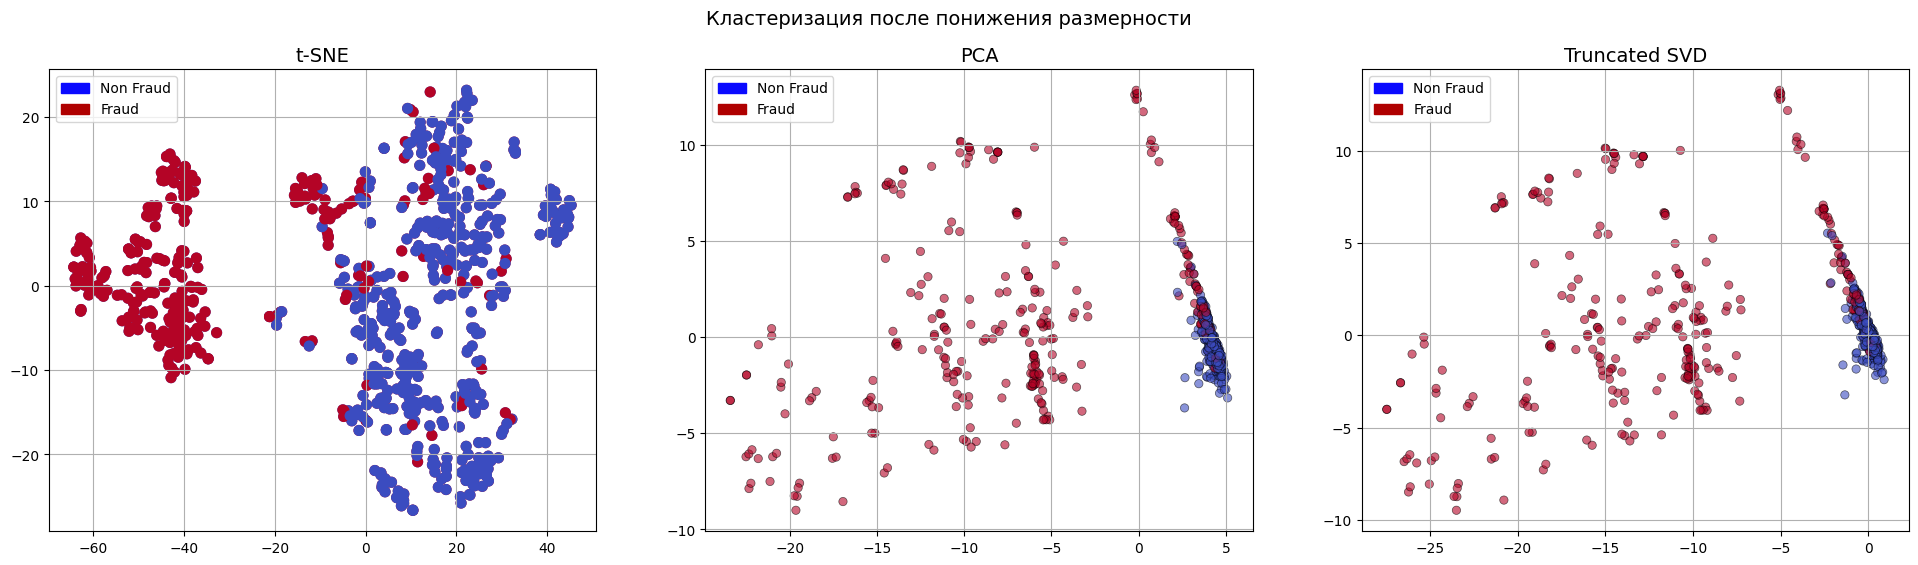

In [64]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Кластеризация после понижения размерности', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Non Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6, edgecolor='k', linewidth=0.5)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# Truncated SVD scatter plot
ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=y, cmap='coolwarm', alpha=0.6, edgecolor='k', linewidth=0.5)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

<h3> Выводы: </h3>
<ul>
<li>Алгоритм t-SNE может довольно точно кластеризовать случаи мошенничества и не мошенничества в нашем наборе данных. </li>
<li> Классы целевой переменной однозначно разделимы, а значит мы можем строить модели! </li>
</ul>

## Продолжение следует .....



<h3 style="text-align: center;">Материалы для изучения scikit-learn:<b></b></h3>

*1) Официальный сайт с подробными описаниями моделей и методов : https://scikit-learn.org/stable/user_guide.html*

*2) Полезный репозиторий с блокнотами: https://github.com/gmonce/scikit-learn-book*

*3) Хороший курс с упражнениями: https://inria.github.io/scikit-learn-mooc/*

In [ ]:
new_df.to_csv('/content/drive/MyDrive/Colab Notebooks/data/creditcard_short.csv')